# Pipeline for the Ilastik API, here we use bees.ipl (3 labels, all features)

In [112]:
import h5py
import matplotlib.pyplot as plt
import cv2
from skimage.morphology import disk, opening, closing
import numpy as np
import time

In [66]:
img = cv2.imread('img_cyril.jpg', cv2.IMREAD_UNCHANGED)
print(img.shape)
cv2.imwrite('img_cyril_gray.jpg', cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
img_gray = cv2.imread('img_cyril_gray.jpg', cv2.IMREAD_UNCHANGED)
print(img_gray.shape)

(2592, 4608, 3)
(2592, 4608)


In [113]:
ILASTIK_PATH = '/Users/fabianprofeta/Desktop/ilastik-1.4.0.post1-OSX.app/Contents/ilastik-release/run_ilastik.sh'
MODEL='bees_monochanel.ilp'
OUTPUT_FOLDER = './imgs_samples_mask/{nickname}_mask.png'
img = 'img2.jpg'
cv2.imwrite('img2_resized.jpg', cv2.resize(cv2.imread(img), (0,0), fx=0.5, fy=0.5))
IMG = 'img2_resized.jpg'
time_start = time.time()
!$ILASTIK_PATH  --headless --project=$MODEL $IMG
print('Time elapsed:', time.time()-time_start, 's')

INFO ilastik.app: Using tiktorch executable: ['/Users/fabianprofeta/Desktop/ilastik-1.4.0.post1-OSX.app/Contents/ilastik-release/bin/python', '-m', 'tiktorch.server']
INFO ilastik.app: config file location: <none>
INFO ilastik.app: Starting ilastik from "/Users/fabianprofeta/Desktop/ilastik-1.4.0.post1-OSX.app/Contents/ilastik-release/lib/python3.7".
Starting ilastik from "/Users/fabianprofeta/Desktop/ilastik-1.4.0.post1-OSX.app/Contents/ilastik-release/lib/python3.7".
WARNING 2024-04-09 08:52:59,837 opConservationTracking 78918 4699203072 Could not find any ILP solver
WARNING 2024-04-09 08:52:59,885 opStructuredTracking 78918 4699203072 Could not find any ILP solver
WARNING 2024-04-09 08:52:59,886 structuredTrackingWorkflow 78918 4699203072 Could not find any learning solver. Tracking will use flow-based solver (DPCT). Learning for tracking will be disabled!
INFO ilastik.shell.projectManager: Opening Project: bees_monochanel.ilp
INFO ilastik.workflows.pixelClassification.pixelClassifi

In [117]:
filename = "img2_resized_Probabilities.h5"
with h5py.File(filename, "r") as f:
    a_group_key = list(f.keys())[0]
    data = list(f[a_group_key])
    ds_arr = f[a_group_key][:,:,0]  # returns as a numpy array
    print(ds_arr)

[[1.   1.   1.   ... 0.02 0.01 0.01]
 [1.   1.   1.   ... 0.02 0.   0.  ]
 [1.   1.   1.   ... 0.01 0.01 0.01]
 ...
 [0.   0.   0.   ... 0.05 0.06 0.06]
 [0.   0.   0.   ... 0.04 0.06 0.06]
 [0.   0.   0.   ... 0.04 0.06 0.06]]


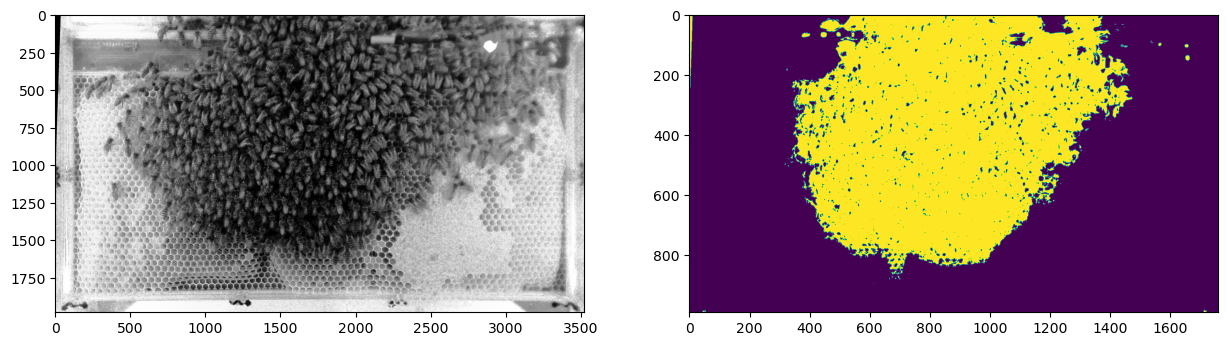

In [118]:
cv2.imwrite('img3_resized_Probabilities.png', ds_arr)
mask = cv2.imread('img3_resized_Probabilities.png', cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(cv2.imread('img2.jpg'), cmap='gray')
ax[1].imshow(mask)
plt.show()

In [119]:
# morphology
mask_open = opening(mask, disk(9))
mask_closed = closing(mask_open, disk(9))

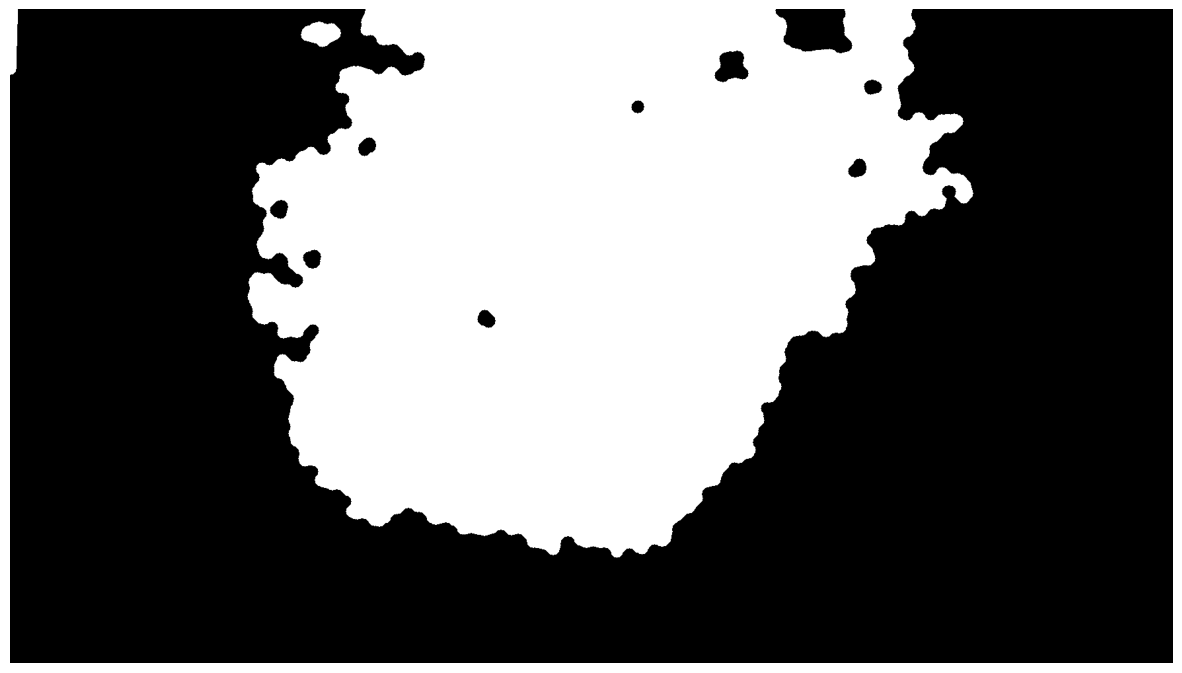

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.imshow(mask_closed, cmap='gray')
ax.axis('off')
# ax.set_title('Random Forest Classifier - Mask after morphological operations')
plt.show()

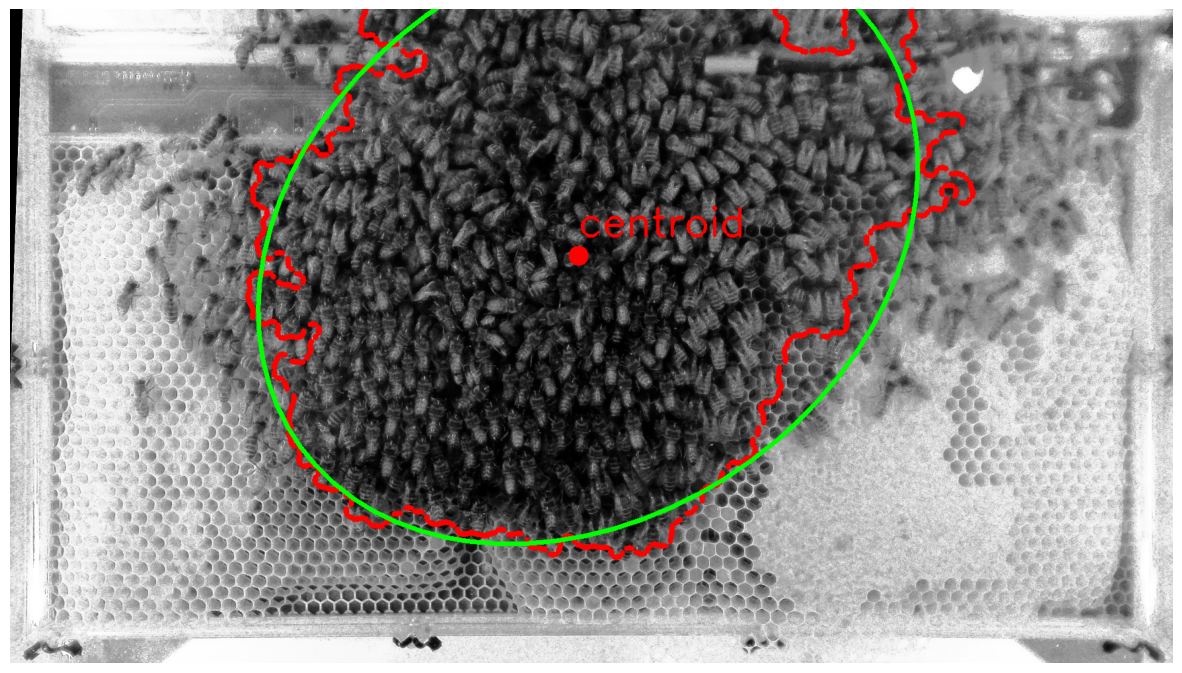

In [122]:
input_image = cv2.resize(cv2.imread('img2.jpg'), (0,0), fx=0.5, fy=0.5)

# now we can find the contours

img_contour = (mask_closed).astype(np.uint8) #convert to uint8 because findContours only accepts uint8
contours, _ = cv2.findContours(img_contour, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #find contours
contour = max(contours, key=cv2.contourArea) #get the biggest contour
img_contour = cv2.cvtColor(img_contour, cv2.COLOR_GRAY2BGR) #convert to BGR because drawContours only accepts BGR
cv2.drawContours(input_image, contour, -1, (255, 0, 0), 7) #draw the biggest contour

# find the centroid of the contour
M = cv2.moments(contour)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
# plot it on the image
cv2.circle(input_image, (cX, cY), 15, (255, 0, 0), -1)
cv2.putText(input_image, "centroid", (cX, cY - 30), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 4);

ellipse = cv2.fitEllipse(contour)
cv2.ellipse(input_image, ellipse, color=(0,255,0), thickness=5)
# print(ellipse[1][0]/ellipse[1][1])
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.imshow(input_image, cmap='gray')
ax.axis('off')
# ax.set_title('Random Forest Classifier - Centroid, Contour and best fitted Ellipse')
plt.show()

In [64]:
print(ellipse)

((1238.22509765625, 634.7855834960938), (1051.801025390625, 1883.0819091796875), 81.47416687011719)
